# Study of EGamma SuperCluster energy correction for hgcal

In [1]:
%load_ext autoreload
%autoreload 1
import ROOT
import JupyROOT.helpers.utils
JupyROOT.helpers.utils.GetGeometryDrawer = lambda:None
import cppyy
from DataFormats.FWLite import Handle
import hist
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import sys
sys.path.append("..")
#import edmReader.pythonizations
%aimport edmReader.edmReader
from edmReader.edmReader import EdmReader, MultiEdmReader

Welcome to JupyROOT 6.26/11


In [9]:
ntuples = list(range(1, 10))
comp = MultiEdmReader([f"/grid_mnt/data_cms_upgrade/cuisset/supercls/diffEgamma/25102_SingleE_D98noPU/v3-1d9a7-mustache/step3_{idx}.root" for idx in ntuples],
                      [f"/grid_mnt/data_cms_upgrade/cuisset/supercls/diffEgamma/25102_SingleE_D98noPU/v3-1d9a7-dnn/step3_{idx}.root" for idx in ntuples])

In [5]:
comp.to(0)

In [3]:
def filterEndcap(collection, positiveEndcap=True):
    return [obj for obj in collection if (positiveEndcap and obj.eta() > 0) or (not positiveEndcap and obj.eta() < 0)]

In [6]:
h_mustache_SC = hist.Hist(hist.axis.Regular(100, 0., 500., name="rawEnergy", label="Raw Mustache SC energy"),
                          hist.axis.Regular(100, 0., 500., name="correctedEnergy", label="Corrected Mustache SC energy"))
for _ in comp:
    for endcap in [True, False]:
        sc = filterEndcap(comp[0].oldHgcalSuperclusters)
        if len(sc) == 1:
            h_mustache_SC.fill(sc[0].rawEnergy(), sc[0].correctedEnergy())

/cvmfs/cms.cern.ch/slc7_amd64_gcc12/external/py3-numpy/1.24.3-6c4922f4e317e74c4b82416c41722d10/lib/python3.9/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/cvmfs/cms.cern.ch/slc7_amd64_gcc12/external/py3-numpy/1.24.3-6c4922f4e317e74c4b82416c41722d10/lib/python3.9/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7fceeae46eb0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7fceeb3cafa0>, text=[])

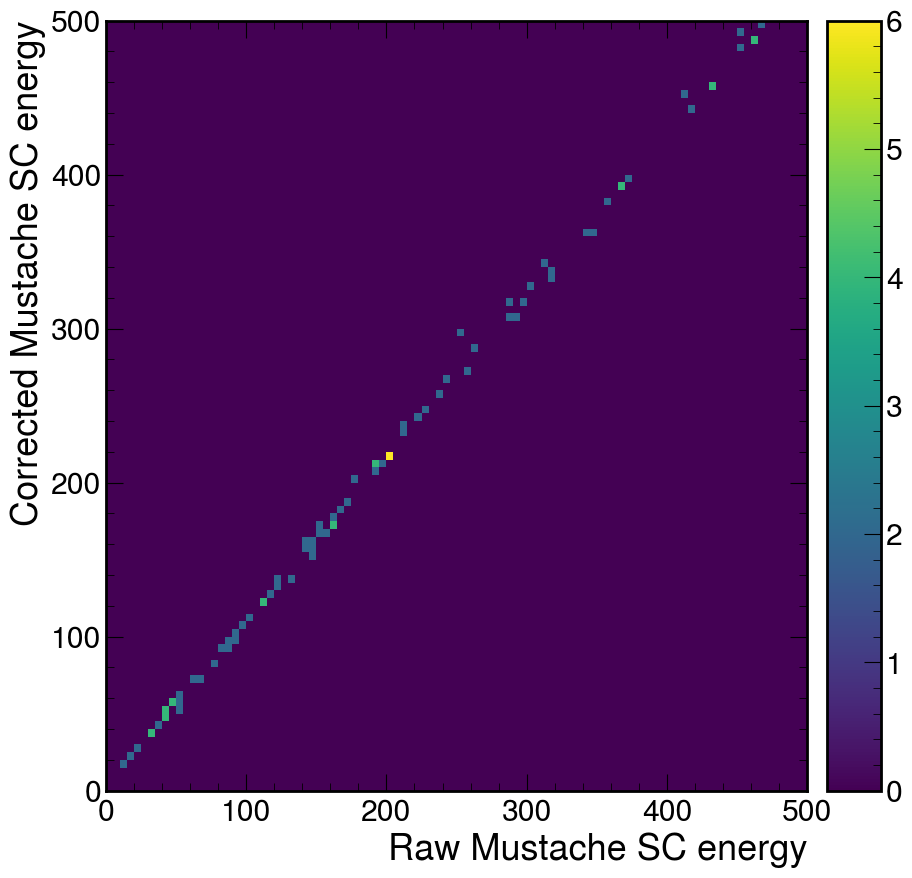

In [8]:
hep.hist2dplot(h_mustache_SC)